In [1]:
import pandas as pd

In [2]:
df_starbucks = pd.read_csv('directory.csv')
df_starbucks.shape

(25600, 13)

In [3]:
df_starbucks = df_starbucks[(df_starbucks['Brand'] == 'Starbucks')]
df_starbucks = df_starbucks[df_starbucks['Country'] == 'US'].reset_index(drop=True)
df_starbucks.shape

(13311, 13)

In [4]:
df_cityre = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df_cityre.shape


(26705, 301)

In [5]:
df_city50 = df_cityre[0:50]
df_city50.shape
df_city50.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,195870.0,195305.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,186516.0,186493.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,94293.0,94409.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,132510.0,132361.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94895.0,94862.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0


In [6]:
top50_feat = df_city50[['RegionName', '2017-01-31']]
top50_feat.head()

,RegionName,2017-01-31
0,New York,584490.0
1,Los Angeles,636974.0
2,Houston,170083.0
3,Chicago,233162.0
4,San Antonio,161663.0


In [7]:
mask = list(df_city50['RegionName'])
df_star50 = df_starbucks[df_starbucks['City'].apply(lambda x: True if x in mask else False)]
merger = df_star50['City'].value_counts().rename_axis('City').reset_index(name = 'NumStarbucks')
merger.head()

,City,NumStarbucks
0,New York,230
1,Chicago,179
2,Las Vegas,153
3,Seattle,151
4,Houston,151


In [8]:
merger = merger.merge(top50_feat, left_on = 'City', right_on = 'RegionName')
merger.drop('RegionName', inplace = True, axis = 1)
merger.head()

,City,NumStarbucks,2017-01-31
0,New York,230,584490.0
1,Chicago,179,233162.0
2,Las Vegas,153,217354.0
3,Seattle,151,637004.0
4,Houston,151,170083.0


In [9]:
import matplotlib.pyplot as plt

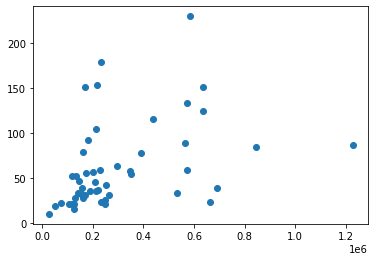

In [10]:
y, x = merger['NumStarbucks'], merger['2017-01-31']

plt.clf()
plt.scatter(x, y)
plt.show()

In [11]:
# normalize for population (2017 stats jesus christ)

# regression? correlation?